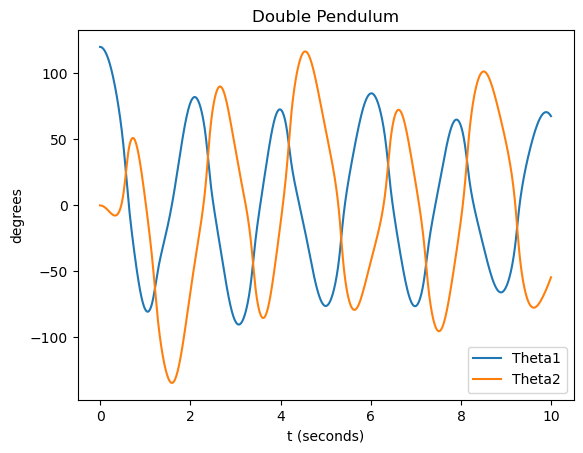

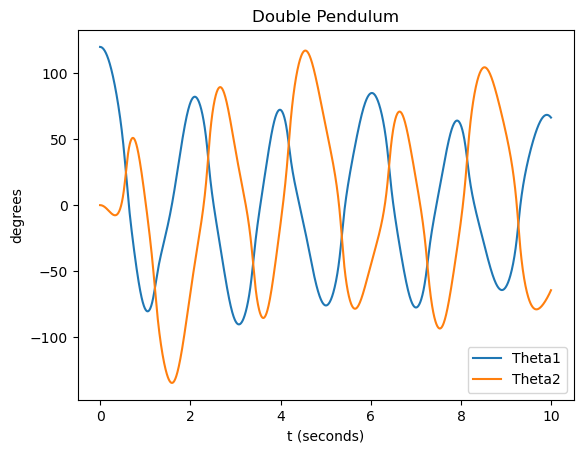

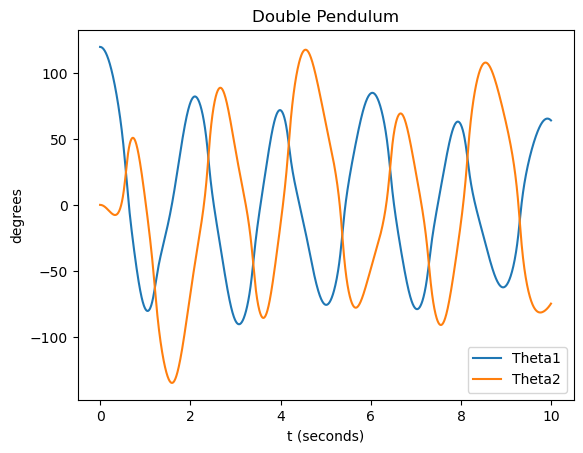

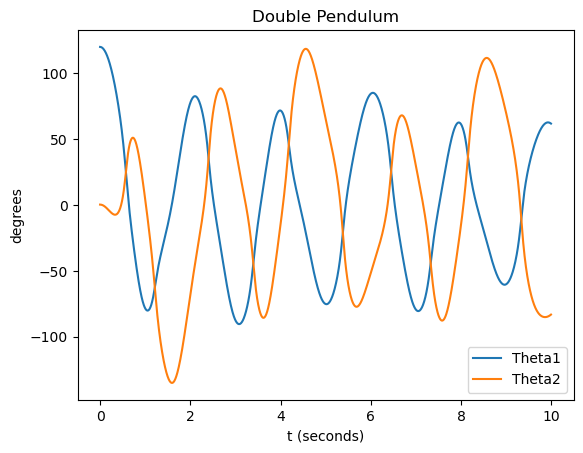

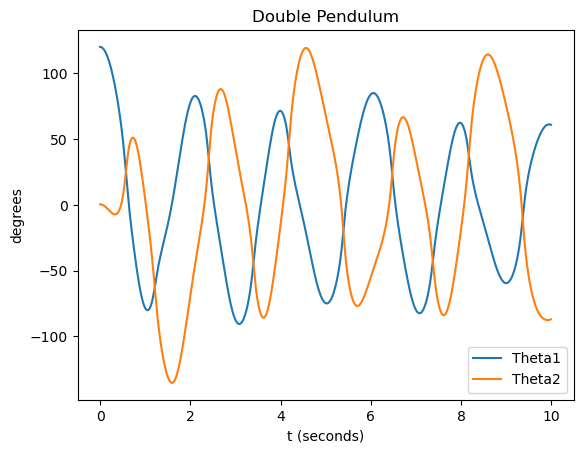

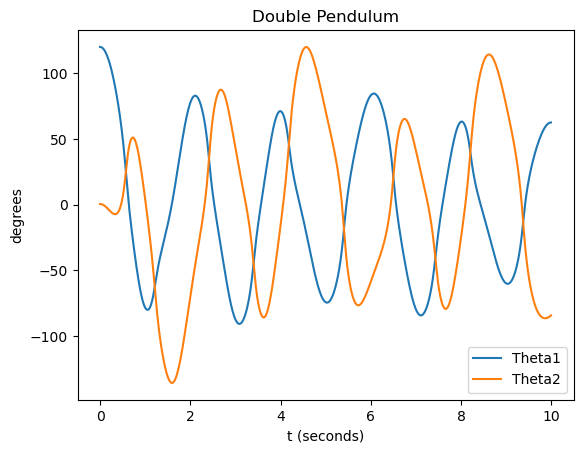

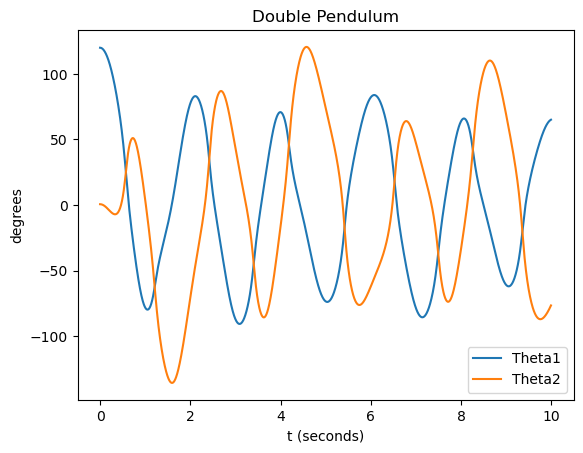

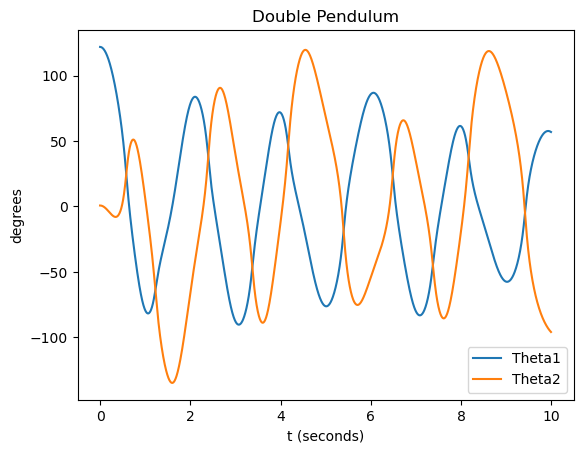

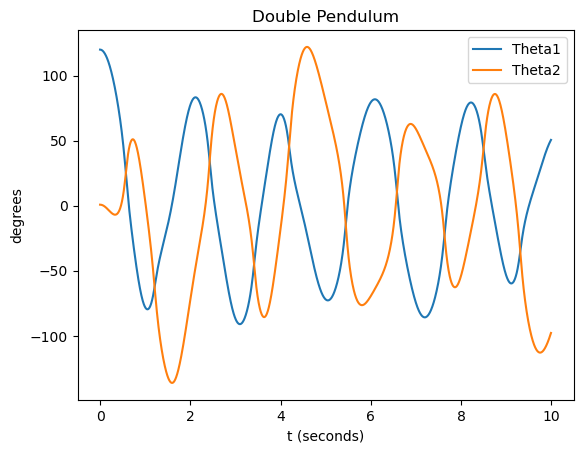

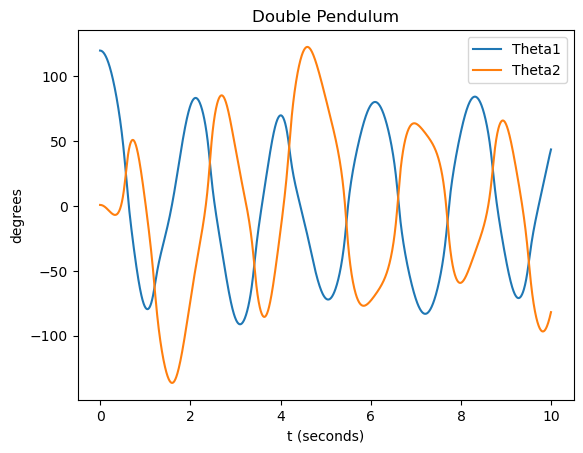

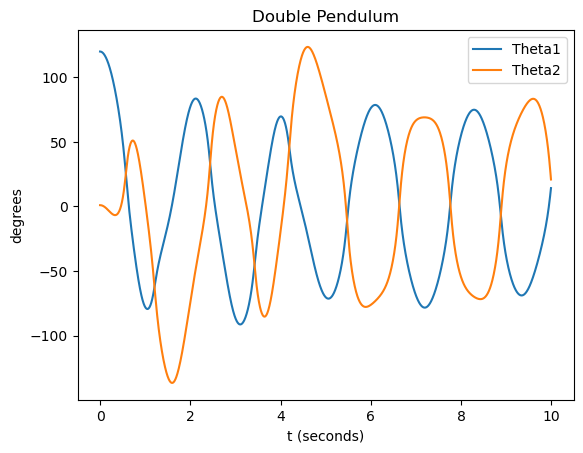

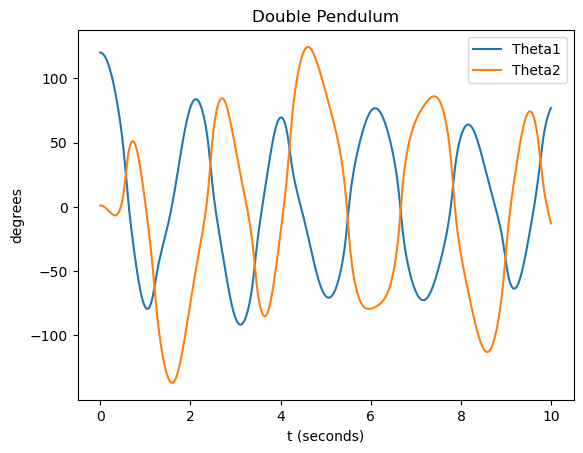

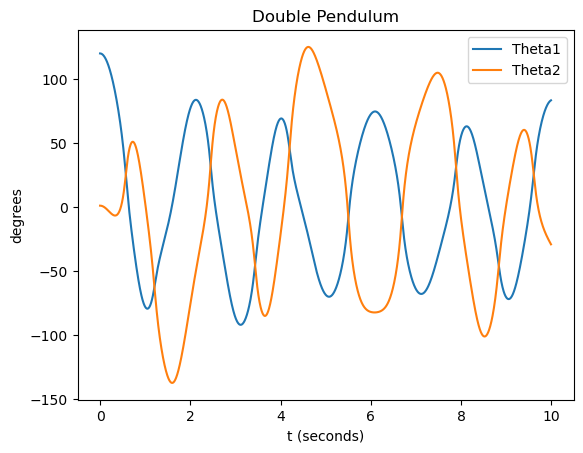

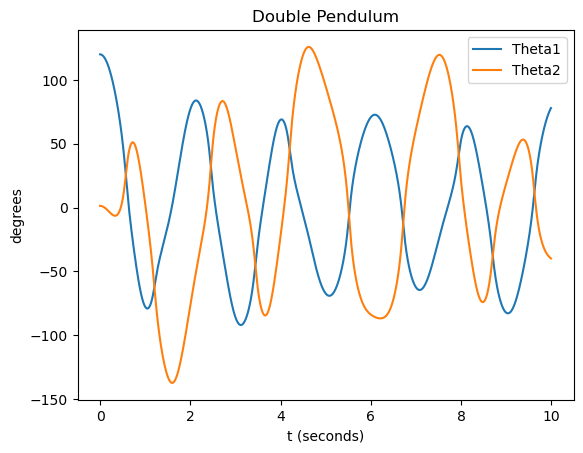

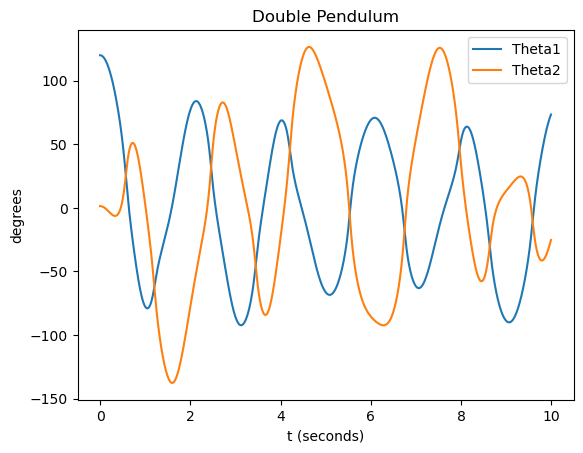

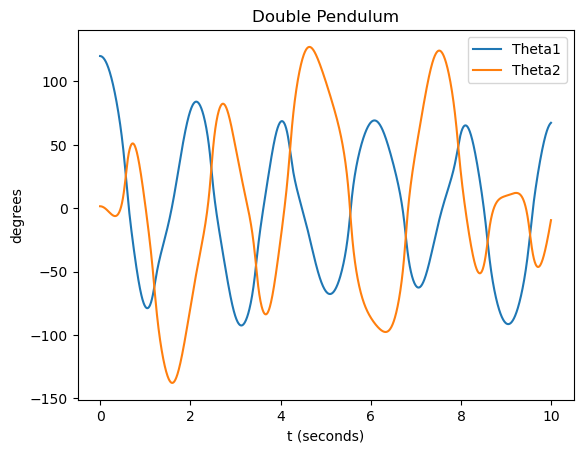

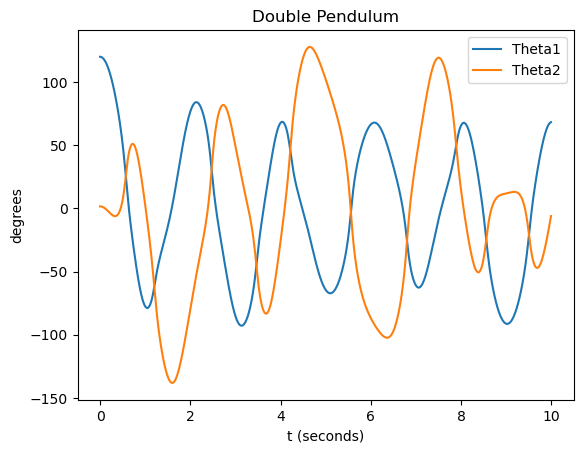

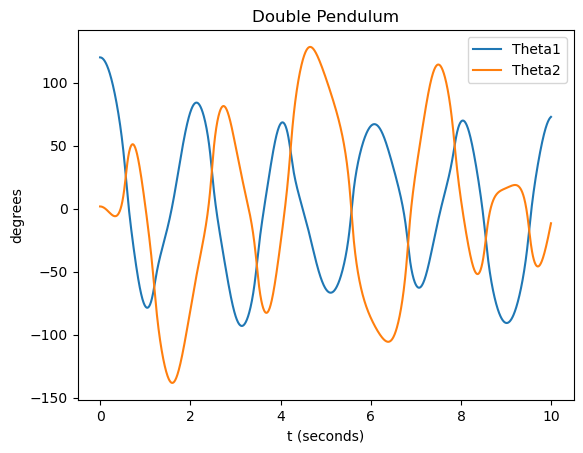

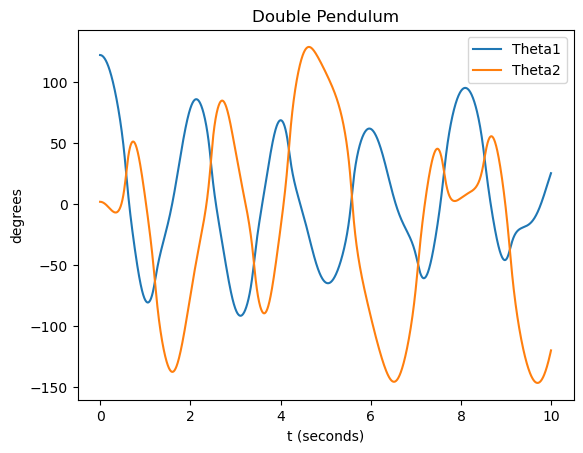

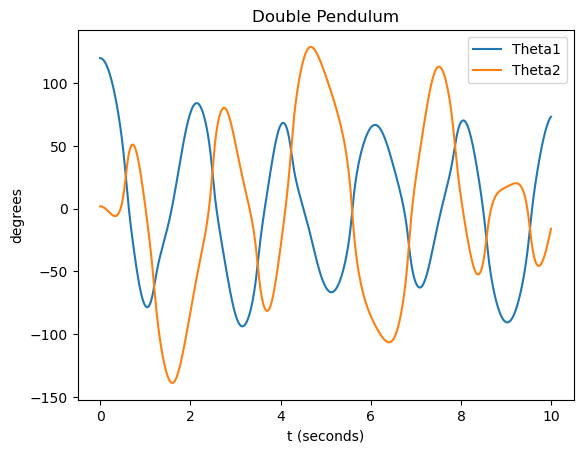

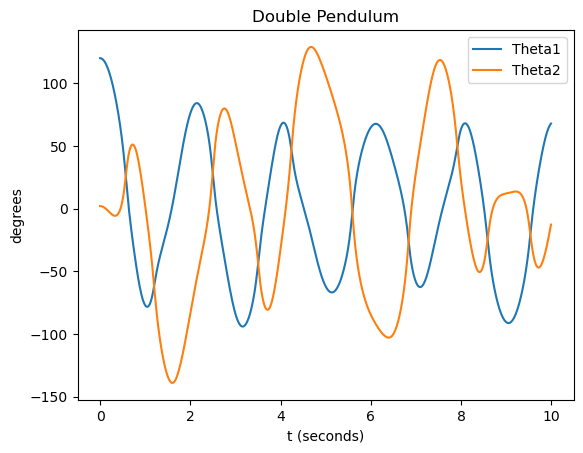

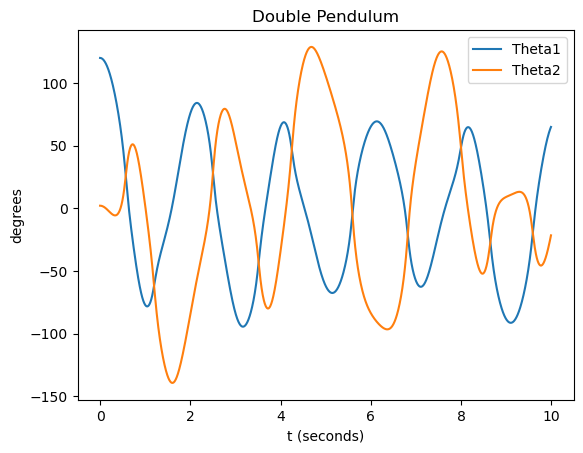

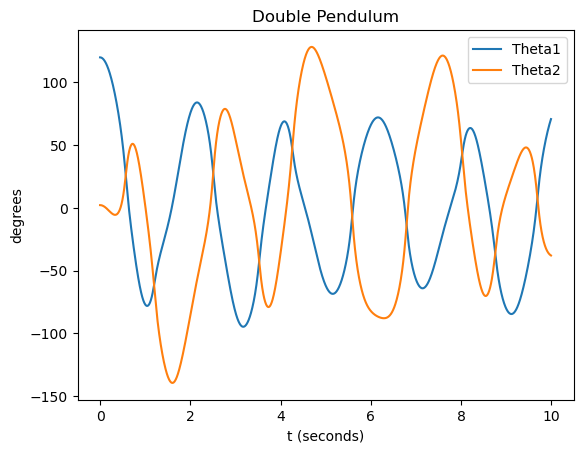

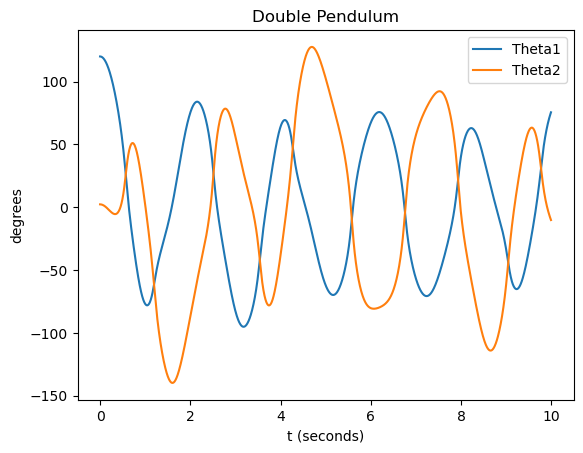

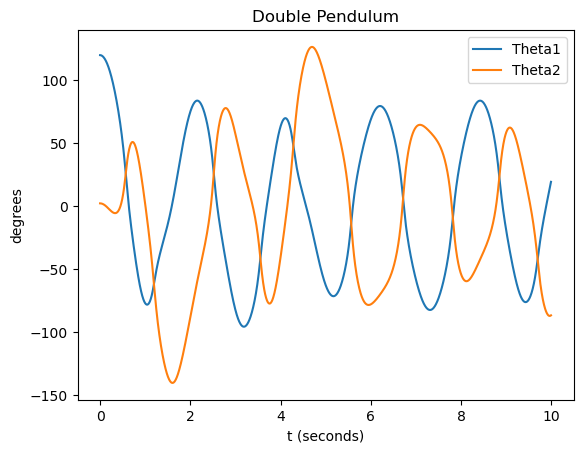

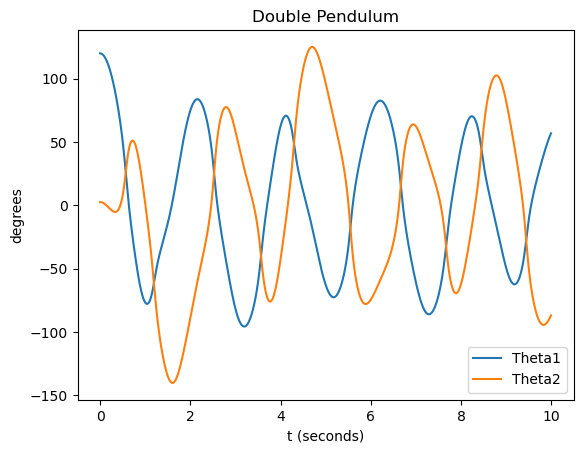

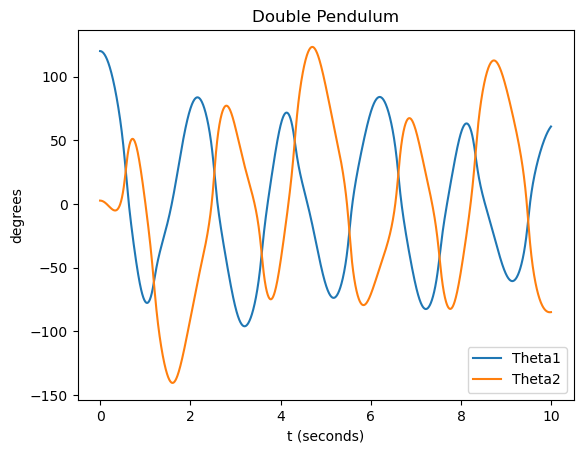

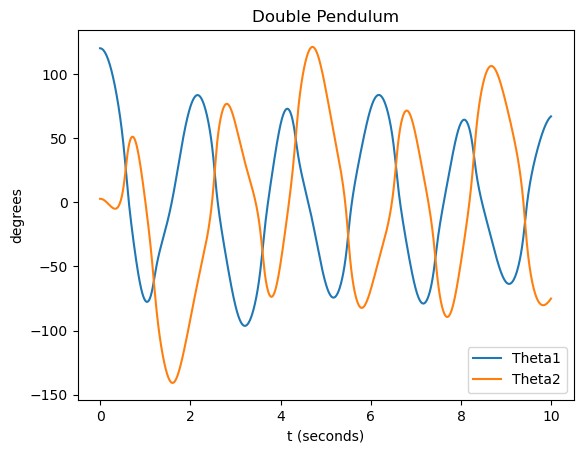

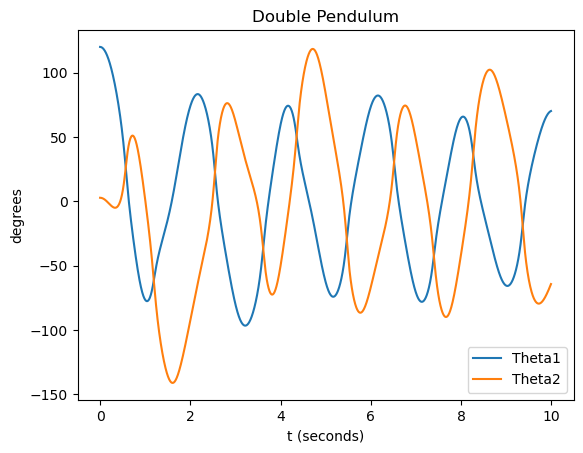

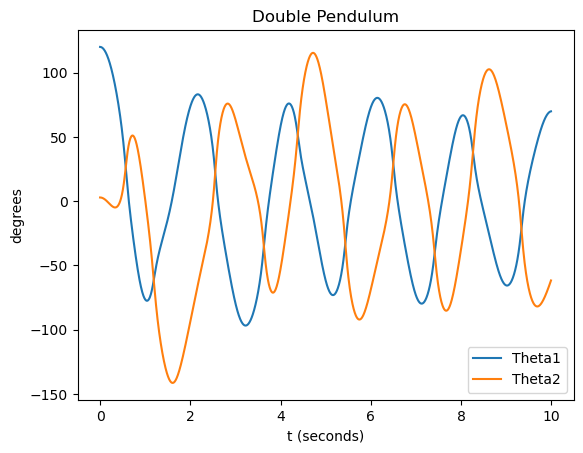

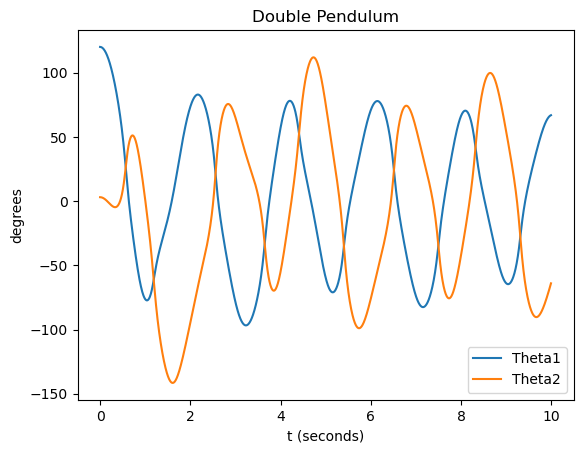

{'120_0': array([[1.        , 0.53546863],
       [0.99996692, 0.53545478],
       [0.99986769, 0.53541325],
       ...,
       [0.75325428, 0.31489452],
       [0.75200424, 0.31679388],
       [0.75069148, 0.31871432]]), '120_0.1': array([[1.        , 0.53491367],
       [0.99996694, 0.53489986],
       [0.99986778, 0.53485847],
       ...,
       [0.74740153, 0.27597679],
       [0.74642877, 0.2774739 ],
       [0.74539872, 0.27899163]]), '120_0.2': array([[1.        , 0.53434665],
       [0.99996697, 0.53433289],
       [0.99986787, 0.53429164],
       ...,
       [0.73655264, 0.23592428],
       [0.73580229, 0.23694166],
       [0.73500009, 0.23798078]]), '120_0.3': array([[1.        , 0.53376175],
       [0.99996699, 0.53374804],
       [0.99986797, 0.53370693],
       ...,
       [0.72460711, 0.20343733],
       [0.72403619, 0.20397523],
       [0.7234174 , 0.20453586]]), '120_0.4': array([[1.        , 0.53315464],
       [0.99996702, 0.53314098],
       [0.99986808, 0.5331    ],

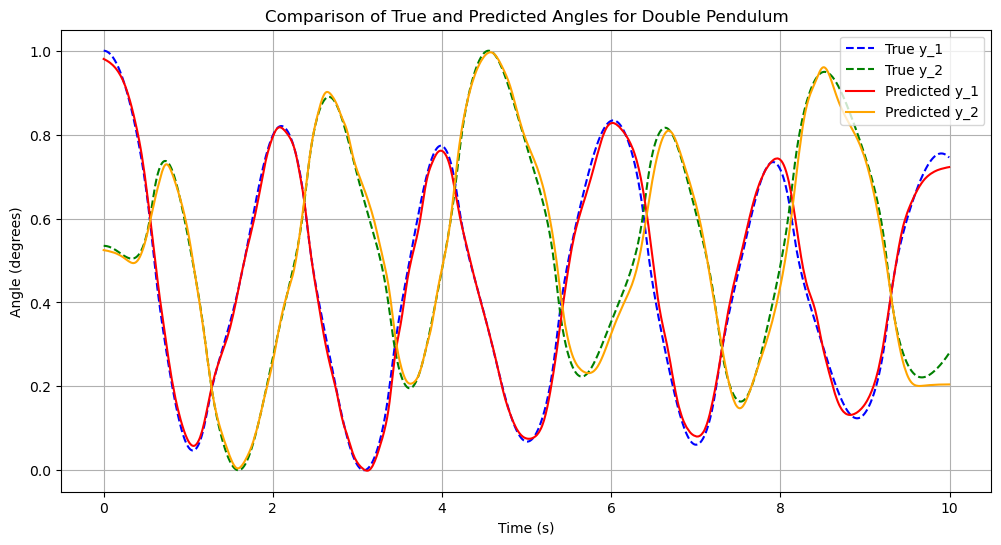

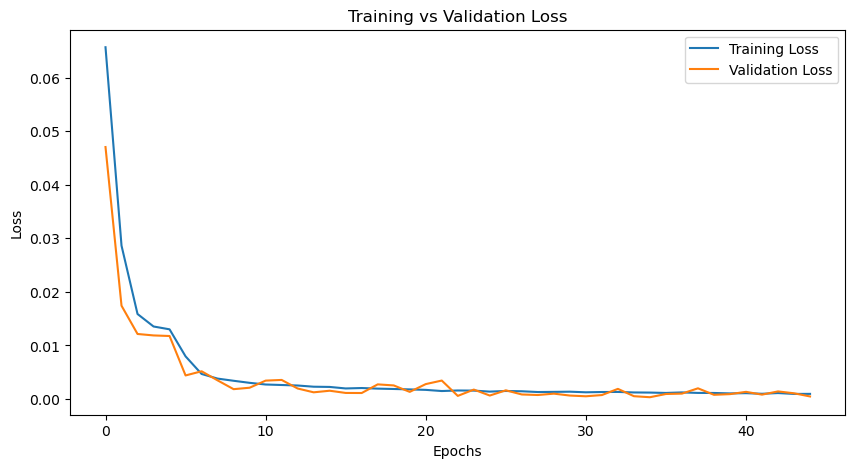

In [6]:
# Future imports for division and print function compatibility
from __future__ import division, print_function
# Standard imports
from math import sin, cos, pi, radians, degrees
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import r2_score, mean_squared_error

# Physical constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L1 = 1  # Length of the first pendulum (m)
L2 = 1  # Length of the second pendulum (m)
m1 = 1.0  # Mass of the first pendulum (kg)
m2 = 1.0  # Mass of the second pendulum (kg)
# Friction/damping coefficients (constant)
damping1 = 0.15  # Damping for the first pendulum
damping2 = 0.15  # Damping for the second pendulum
# Derivative function for the double pendulum system with friction
def f(r, t, L1, L2, damping1, damping2):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]
    # Equations of motion for the double pendulum with friction
    ftheta1 = omega1
    fomega1 = (
        -g * (2 * m1 + m2) * sin(theta1)
        - m2 * g * sin(theta1 - 2 * theta2)
        - 2 * sin(theta1 - theta2) * m2 * (omega2 ** 2 * L2 + omega1 ** 2 * L1 * cos(theta1 - theta2))
        - damping1 * omega1  # Damping term for the first pendulum
    ) / (L1 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    ftheta2 = omega2
    fomega2 = (
        2 * sin(theta1 - theta2) * (omega1 ** 2 * L1 * (m1 + m2)
        + g * (m1 + m2) * cos(theta1)
        + omega2 ** 2 * L2 * m2 * cos(theta1 - theta2))
        - damping2 * omega2  # Damping term for the second pendulum
    ) / (L2 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))
    return np.array([ftheta1, fomega1, ftheta2, fomega2], float)
# Simulation parameters
a = 0.0
b = 10
N = 2000
h = (b - a) / N
# Time points

angles = [[120, 0], [120, 0.1], [120, 0.2], [120,0.3], [120,0.4], [120,0.5], [120,0.6],[122, 0.7], [120, 0.8], [120,0.9], [120,1], [120, 1.1], [120, 1.2], [120, 1.3], [120,1.4], [120,1.5], [120,1.6], [120,1.7],[122, 1.8], [120, 1.9], [120,2.0], [120,2.1], [120, 2.2], [120, 2.3], [120,2.4], [120,2.5], [120,2.6], [120,2.7], [120, 2.8], [120, 2.9], [120,3.0]]

for x in angles:
    tpoints = np.arange(a, b, h)
    theta1_points = np.zeros_like(tpoints)
    theta2_points = np.zeros_like(tpoints)

    q = np.array([x[0] * pi / 180, 0, x[1] * pi / 180, 0], float)

    for i, t in enumerate(tpoints):
        theta1_points[i] = q[0] * 180 / pi
        theta2_points[i] = q[2] * 180 / pi

        k1 = h * f(q, t, L1, L2, damping1, damping2)
        k2 = h * f(q + 0.5 * k1, t + 0.5 * h, L1, L2, damping1, damping2)
        k3 = h * f(q + 0.5 * k2, t + 0.5 * h, L1, L2, damping1, damping2)
        k4 = h * f(q + k3, t + h, L1, L2, damping1, damping2)
        q += (k1 + 2 * k2 + 2 * k3 + k4) / 6

    plt.plot(tpoints, theta1_points, label='Theta1')
    plt.plot(tpoints, theta2_points, label='Theta2')
    plt.title("Double Pendulum")
    plt.xlabel("t (seconds)")
    plt.ylabel("degrees")
    plt.legend()
    plt.show()

    data = np.stack((theta1_points, theta2_points), axis=1)
    np.save(f'pendulum_data_{str(x[0])}_{str(x[1])}.npy', data)


# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Define the dataset class
class QuadraticDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32).to(device)  # Shape (N, 3)
        self.y = torch.tensor(y, dtype=torch.float32).to(device)  # Shape (N, 2)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

data = {}

for i in angles:
  loaded_data = np.load(f'pendulum_data_{str(i[0])}_{str(i[1])}.npy')
  scaler = MinMaxScaler()
  data_ = scaler.fit_transform(loaded_data)
  data[f'{str(i[0])}_{str(i[1])}'] = data_

print(data)

def create_io(data):
    x, x_1, x_2, y_1, y_2 = [], [], [], [], []
    for starting in data:
      starting_theta_1_degrees = float(starting.split("_")[0])
      starting_theta_2_degrees = float(starting.split("_")[1])

      starting_theta_1 = starting_theta_1_degrees * pi /180
      starting_theta_2 = starting_theta_2_degrees * pi /180

      angle_data = data[starting]
      for i in range(len(angle_data)):
          x.append(tpoints[i])
          x_1.append(starting_theta_1)
          x_2.append(starting_theta_2)
          y_1.append(angle_data[i][0])
          y_2.append(angle_data[i][1])
    return x, x_1, x_2, y_1, y_2

x, x_1, x_2, y_1, y_2 = create_io(data)

# Normalize data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_combined = np.vstack([x_1, x_2, x]).T
x_scaled = scaler_x.fit_transform(x_combined)

y_combined = np.vstack([y_1, y_2]).T
y_scaled = scaler_y.fit_transform(y_combined)

# Create dataset and dataloaders
dataset = QuadraticDataset(x_scaled, y_scaled)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Define the LSTM model class
class BiRNNModel (nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(BiRNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True,
                          bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])  # Output from the final time step
        return out

input_size = 3
hidden_size = 50
output_size = 2
num_layers = 5
bidirectionalmodel = BiRNNModel(input_size, hidden_size, output_size, num_layers).to(device)

# Define loss function and optimizer
loss_function = nn.MSELoss().to(device)
optimizer = optim.Adam(bidirectionalmodel.parameters(), lr=0.001)

early_stopping_patience = 10
best_loss = float('inf')
patience_counter = 0


# Training function with early stopping
def train_model(model, train_loader, test_loader, num_epochs):
    best_loss = float('inf')
    patience_counter = 0
    best_model = None
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for sequences, targets in train_loader:
            sequences, targets = sequences.to(device), targets.to(device)
            sequences = sequences.unsqueeze(1)  # Add sequence dimension
            optimizer.zero_grad()
            y_pred = model(sequences)
            loss = loss_function(y_pred, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        test_loss = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for sequences, targets in test_loader:
                sequences, targets = sequences.to(device), targets.to(device)
                sequences = sequences.unsqueeze(1)  # Add sequence dimension
                y_pred = model(sequences)
                loss = loss_function(y_pred, targets)
                test_loss += loss.item()
                all_preds.append(y_pred.cpu())
                all_targets.append(targets.cpu())

        test_loss /= len(test_loader)
        val_losses.append(test_loss)

        all_preds = torch.cat(all_preds).numpy()
        all_targets = torch.cat(all_targets).numpy()

        r2 = r2_score(all_targets, all_preds, multioutput='uniform_average')
        print(f'Epoch {epoch+1}, Train Loss: {train_loss}, Test Loss: {test_loss}, R^2 Score: {r2}')

        if test_loss < best_loss:
            best_loss = test_loss
            best_model = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= early_stopping_patience:
            print("Early stopping")
            break

    if best_model:
        model.load_state_dict(best_model)
        torch.save(bidirectionalmodel.state_dict(), 'lstm_model.pth')

    return train_losses, val_losses

# Training the model
NUM_EPOCHS = 100
train_losses, val_losses = train_model(bidirectionalmodel, train_loader, test_loader, NUM_EPOCHS)

# Generate predictions for 120,0
x_dense_combined = np.vstack([x_1[2000:4000], x_2[2000:4000], x[2000:4000]]).T
x_dense_scaled = scaler_x.transform(x_dense_combined)
x_dense_tensor = torch.tensor(x_dense_scaled, dtype=torch.float32).unsqueeze(1).to(device)

bidirectionalmodel.eval()
with torch.no_grad():
    y_pred_scaled = bidirectionalmodel(x_dense_tensor).cpu().numpy()



# Inverse transform predictions
y_pred_90_90 = scaler_y.inverse_transform(y_pred_scaled)

# RMSE and R^2 scores
rmse = np.sqrt(mean_squared_error(y_combined[2000:4000], y_pred_90_90))
r2 = r2_score(y_combined[2000:4000], y_pred_90_90)
print(f"Final RMSE: {rmse}")
print(f"Final R^2 Score: {r2}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(x[2000:4000], y_1[2000:4000], label='True y_1', color='blue', linestyle='--')
plt.plot(x[2000:4000], y_2[2000:4000], label='True y_2', color='green', linestyle='--')
plt.plot(x[2000:4000], y_pred_90_90[:, 0], label='Predicted y_1', color='red')
plt.plot(x[2000:4000], y_pred_90_90[:, 1], label='Predicted y_2', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Comparison of True and Predicted Angles for Double Pendulum')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training vs validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

RMSE on new angle: 0.01790802388002332
R^2 Score on new angle: 0.9953231200219425


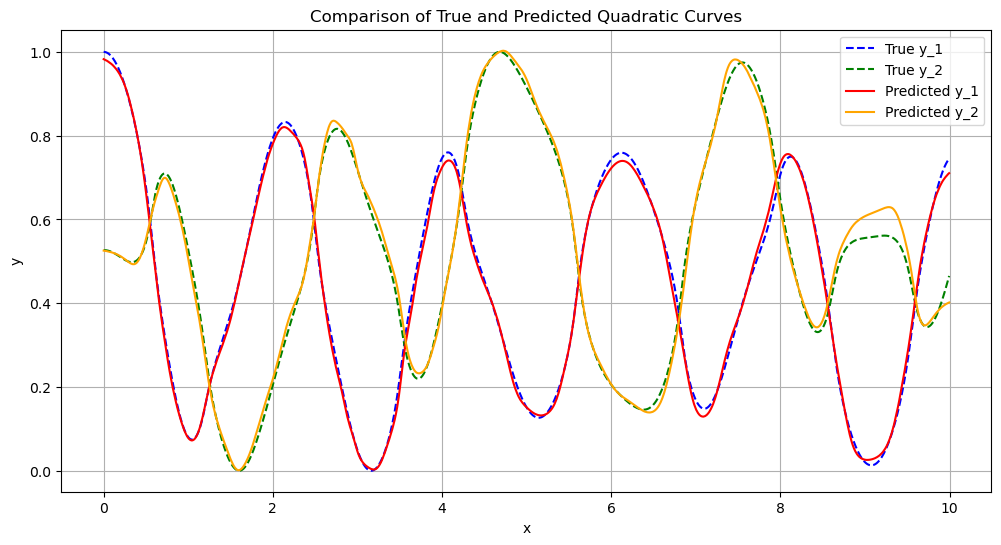

In [10]:
# Generate predictions for 85, 85

angle = [120,2.05]


tpoints = np.arange(a, b, h) # seconds, split into intervals of 100
theta1_points = np.zeros_like(tpoints) # what the first pendulm angle should be (empty)
theta2_points = np.zeros_like(tpoints) # what the second pendulm angle should be (empty)

q = np.array([angle[0]*pi/180, 0, angle[1]*pi/180, 0], float)

for i, t in enumerate(tpoints):
    theta1_points[i] = q[0] * 180 / pi # converted from theta (θ) to degrees (°)
    theta2_points[i] = q[2] * 180 / pi

    k1 = h * f(q, t, L1, L2, damping1, damping2)
    k2 = h * f(q + 0.5 * k1, t + 0.5 * h, L1, L2,damping1, damping2)
    k3 = h * f(q + 0.5 * k2, t + 0.5 * h, L1, L2,damping1, damping2)
    k4 = h * f(q + k3, t + h, L1, L2,damping1, damping2)
    q += (k1 + 2 * k2 + 2 * k3 + k4) / 6

x_1_unknown = [angle[0]*pi/180]*N
x_2_unknown = [angle[1]*pi/180]*N
x_unknown = tpoints.tolist()
scaler = MinMaxScaler()
y_1_2_unknown = scaler.fit_transform([[a, b] for a, b in zip(theta1_points, theta2_points)])
y_1_unknown, y_2_unknown = map(list, zip(*y_1_2_unknown))
y_combined = np.vstack([y_1_unknown, y_2_unknown]).T
y_scaled = scaler_y.fit_transform(y_combined)

x_dense_combined = np.vstack([x_1_unknown, x_2_unknown, x_unknown]).T
x_dense_scaled = scaler_x.transform(x_dense_combined)
x_dense_tensor = torch.tensor(x_dense_scaled, dtype=torch.float32).unsqueeze(1).to(device)  # Shape (500, 1, 2)

bidirectionalmodel.eval()
with torch.no_grad():
    y_pred_scaled = bidirectionalmodel(x_dense_tensor).cpu().numpy()

# Inverse transform predictions
y_pred_unknown = scaler_y.inverse_transform(y_pred_scaled)

# PLOTTING LOOKS A LITTLE OFF BECAUSE IT IS PLOTTING ALL ANGLES, NEEDS TO BE TURNED INTO NUMPY ARRAY AND SET TO NP.WHERE
# x_1 = initial angle 1 and x_2 is initial angle
# Calculate RMSE and R^2 score
rmse = np.sqrt(mean_squared_error(y_combined, y_pred_unknown))
r2 = r2_score(y_combined, y_pred_unknown)

print(f"RMSE on new angle: {rmse}")
print(f"R^2 Score on new angle: {r2}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x_unknown, y_1_unknown, label='True y_1', color='blue', linestyle='--')
plt.plot(x_unknown, y_2_unknown, label='True y_2', color='green', linestyle='--')
plt.plot(x_unknown, y_pred_unknown[:, 0], label='Predicted y_1', color='red')
plt.plot(x_unknown, y_pred_unknown[:, 1], label='Predicted y_2', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of True and Predicted Quadratic Curves')
plt.legend()
plt.grid(True)
plt.show()